In [3]:
! pip install --upgrade pip setuptools wheel
! pip install -q networkx
! pip install -q pandas
! pip install -q matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [43]:
from itertools import combinations
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import glob
import string
import random
import numpy as np
from collections import OrderedDict

# Scale Free Gragh (Barabási–Albert)

In [2]:
import random
import networkx as nx
from networkx.generators.classic import empty_graph

def barabasi_albert_graph(n, m, seed=None):
    """
    Returns a random graph according to the Barabási–Albert preferential
    attachment model.

    A graph of `n` nodes is grown by attaching new nodes each with `m`
    edges that are preferentially attached to existing nodes with high degree.

    Parameters
    ----------
    n : int
        Number of nodes.
    m : int
        Number of edges to attach from a new node to existing nodes.
    seed : int, optional
        Seed for random number generator (default=None).

    Returns
    -------
    G : Graph

    Raises
    ------
    NetworkXError
        If `m` does not satisfy `1 <= m < n`.
    """
    if m < 1 or m >= n:
        raise nx.NetworkXError(
            f"Barabási–Albert network must have m >= 1 and m < n, m = {m}, n = {n}"
        )
    if seed is not None:
        random.seed(seed)

    # Add m initial nodes (m0 in Barabási–Albert model)
    G = empty_graph(m)
    G.name = f"barabasi_albert_graph({n},{m})"
    # Target nodes for new edges
    targets = list(range(m))
    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes = []
    # Start adding the other n-m nodes. The first new node is m.
    source = m
    while source < n:
        # Add edges to m nodes from the source.
        G.add_edges_from(zip([source] * m, targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend([source] * m)
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachment)
        targets = random.sample(repeated_nodes, m)
        source += 1
    return G


In [59]:
import networkx as nx

def generate_ba_graph(n, m):
    """
    Generates a Barabási–Albert (BA) model graph using NetworkX.

    Parameters:
        n (int): Total number of nodes in the graph.
        m (int): Number of edges to attach from a new node to existing nodes.

    Returns:
        nx.Graph: A NetworkX graph generated using the BA model.
    """
    if m < 1 or m >= n:
        raise ValueError("m must satisfy 1 <= m < n")
    
    # Generate the graph using NetworkX's barabasi_albert_graph function
    ba_graph = nx.barabasi_albert_graph(n, m)
    
    return ba_graph


In [62]:
n = 100
outdir=f'./synth-graphs-{n}/'
indir=f'./synth-graphs-{n}/'

!mkdir 'synth-graphs-{n}/'
mvals = [i for i in range(10, 100, 5)]


def scale_free_graph():
    for m in mvals: #idx, m in enumerate(mvals):
        # g = barabasi_albert_graph(n, m, None)
        g = generate_ba_graph(n,m)
        edges = g.edges()
        file_name = f'./synth-graphs-{n}/scale_free_graph_m_{m}.txt'
        with open(file_name, 'w') as fp:
            fp.write('\n'.join('{} {}'.format(x[0],x[1]) for x in edges))

scale_free_graph()

#convert scale free graphs
for m in mvals:
    file_name = 'scale_free_graph_m_'+str(m)
    os.system('./transgrh.pl < '+ indir+file_name+'.txt' +' > ' + outdir+file_name+'.grh')

! rm synth-graphs-{n}/*.txt

rm: cannot remove 'synth-graphs-1000/*.txt': No such file or directory


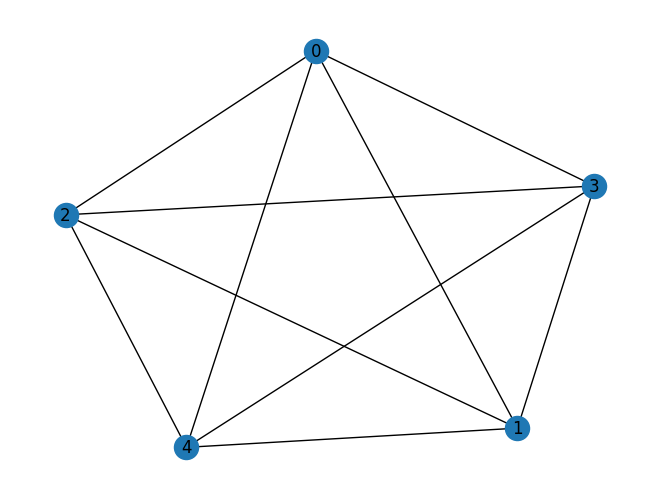

In [44]:
import networkx as nx
import random

def generate_graph_with_density(num_nodes, density, directed=False):
    # Calculate the maximum number of edges
    max_edges = num_nodes * (num_nodes - 1)
    if not directed:
        max_edges //= 2  # Adjust for undirected graph

    # Calculate the required number of edges for the given density
    num_edges = int(density * max_edges)

    # Create an empty graph
    G = nx.DiGraph() if directed else nx.Graph()
    G.add_nodes_from(range(num_nodes))

    # Randomly add the required number of edges
    all_possible_edges = list(nx.non_edges(G))  # Get all possible edges
    chosen_edges = random.sample(all_possible_edges, num_edges)
    G.add_edges_from(chosen_edges)

    return G

# Example Usage
num_nodes = 5
desired_density = 1.0
graph = generate_graph_with_density(num_nodes, desired_density)

# # Print basic information
# print(f"Generated graph summary: {graph.summary()}")
# print(f"Actual density: {nx.density(graph)}")

# Draw the graph
import matplotlib.pyplot as plt
nx.draw(graph, with_labels=True)
plt.show()


In [57]:
import os
import random
import networkx as nx


outdir = './density_graphs/'
indir = './density_graphs/'

# Ensure the directory exists
os.makedirs(outdir, exist_ok=True)

nodes_counts = [100] #, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000]
# nodes_counts = [i for i in range(50, 2000, 50)]
# densities = [0.01, 0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35]
densities = [ i / 100 for i in range(1, 70, 1)]
# densities = [0.1]

# Function to generate and save density graphs
def generate_graph_with_density(num_nodes, density, directed=False):
    max_edges = num_nodes * (num_nodes - 1)
    if not directed:
        max_edges //= 2
    num_edges = int(density * max_edges)
    
    # print(max_edges, num_edges, density)
    
    G = nx.DiGraph() if directed else nx.Graph()
    G.add_nodes_from(range(num_nodes))
    all_possible_edges = list(nx.non_edges(G))
    chosen_edges = random.sample(all_possible_edges, num_edges)
    G.add_edges_from(chosen_edges)
    return G

def density_graphs():
    for n in nodes_counts:
        for d in densities:
            g = generate_graph_with_density(n, d, directed=False)  # Undirected graph
            edges = g.edges()
            density_str = f"{d:.2f}".replace("0.", "")  # Clean density representation
            file_name = f"{outdir}nodes_{n}_density_{density_str}.txt"
            with open(file_name, "w") as fp:
                fp.write('\n'.join(f"{x[0]} {x[1]}" for x in edges))

density_graphs()

#convert scale free graphs
for n in nodes_counts:
    for d in densities:
        density_str = f"{d:.2f}".replace("0.", "")  # Clean density representation
        
        file_name = f"nodes_{n}_density_{density_str}"
        os.system('./transgrh.pl < '+ indir+file_name+'.txt' +' > ' + outdir+file_name+'.grh')

! rm density_graphs/*.txt

In [56]:
! rm density_graphs/*.grh
# ! rm density_graphs/*.txt